In [1]:
import Ab as ab
import datetime as dt
import pandas as pd
sd = dt.datetime(2002,1,1)
ed = dt.datetime(2023,5,5) + dt.timedelta(days=1) 
# 1x leveraged nasdaq 100 etf
qqq = ab.StockData('QQQ')
qqq.get_data_from_yfinance('QQQ',sd,ed+dt.timedelta(days=1))

qld = ab.StockData('QLD')
qld.get_data_from_yfinance('QLD',sd,ed+dt.timedelta(days=1))

tqqq = ab.StockData('TQQQ')
tqqq.get_data_from_yfinance('TQQQ',sd,ed+dt.timedelta(days=1))

spy = ab.StockData('SPY')
spy.get_data_from_yfinance('SPY',sd,ed+dt.timedelta(days=1))

ticker = tqqq

naa200r = ab.StockData('NAA200R')
naa200r.get_data_from_csv('data/NAA200R.csv')

indicator = naa200r



GPU acceleration is available
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [2]:
test_start = dt.datetime(2016,1,22)
test_end = dt.datetime(2023,5,5)


In [3]:
#buy and hold

bah = ab.BuyAndHold(ticker)
bah.run_strategy(ticker,test_start,test_end)
bah.trades

--- 0.0010571479797363281 seconds ---


,Signal
Date,
2016-01-22,1
2023-05-05,-1


In [4]:

bah_bt = ab.BackTest()
start_time = time.time()
bah_bt.run_backtest(bah,ticker,test_start,test_end)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.5526342391967773 seconds ---



<Ab.StockData object at 0x7f8ea948a3b0>:
cumulative return      : 656.47%
compound anual return  : 33.5185%
max_drawdown           : -81.11%
sharp_ratio            : 4.76%
average of daily return: 0.2047%
std of daily return    : 4.3039%
number of trades       : 2,
trading days           : 2660,
batting Average        : 100.00%
Gain Average           : 656.47%
Loss Average           : nan%
Risk Reward Ratio      : nan
Gain STD               : nan%
Loss STD               : nan%
        


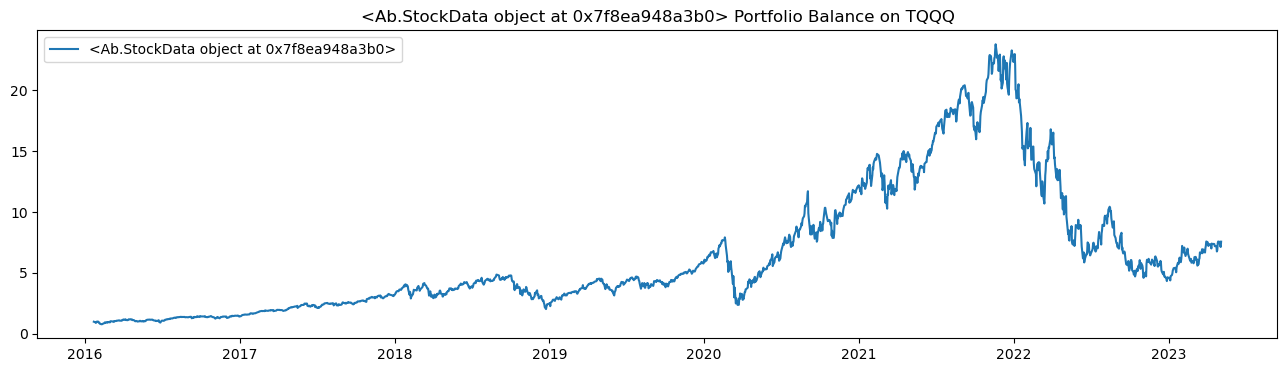

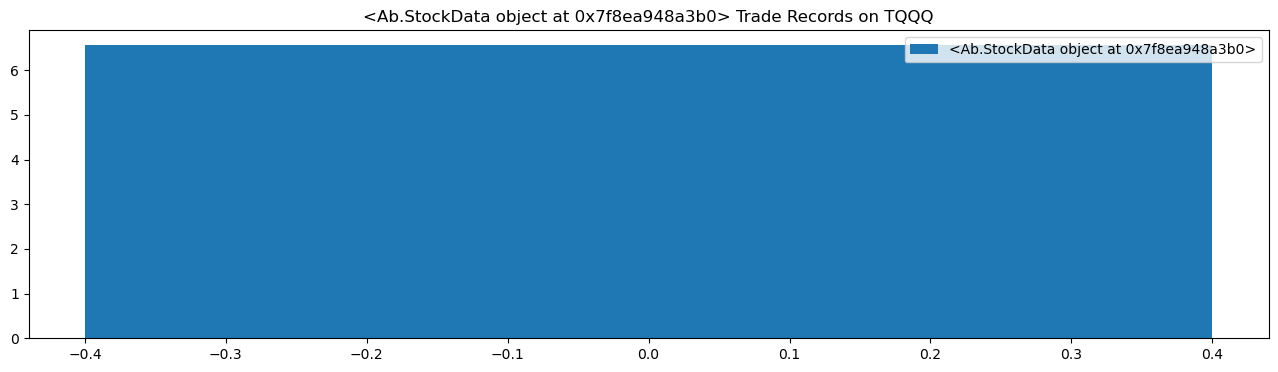

In [5]:

bah_bt.plot_balance()
bah_bt.plot_records()
bah_bt.performance_summary()

In [6]:
naa200r.data

,Day,Open,High,Low,Close,Volume
Date,,,,,,
2001-12-27,Thu,51.331,51.331,51.331,51.331,0
2001-12-28,Fri,51.550,51.550,51.550,51.550,0
2001-12-31,Mon,50.672,50.672,50.672,50.672,0
2002-01-02,Wed,50.969,50.969,50.969,50.969,0
2002-01-03,Thu,54.946,54.946,54.946,54.946,0
...,...,...,...,...,...,...
2023-05-01,Mon,30.945,32.075,30.916,31.243,0
2023-05-02,Tue,30.648,30.708,28.045,28.758,0
2023-05-03,Wed,29.064,30.966,28.945,29.064,0


In [7]:
stg = ab.Threshold('NAA200R')
stg.run_strategy(naa200r, start_date=test_start, end_date=test_end)

#stg = ab.MAThreshold('NAA200R',21, 1,1)
#stg.run_strategy(naa200r, test_start, test_end)

#stg = ab.MACross('MaCross',50,200)
#stg.run_strategy(naa200r, test_start, test_end)


In [8]:
naa200r_bt_daily = ab.BackTest()
naa200r_bt_daily.run_backtest(stg, ticker, test_start,test_end)



NAA200R 15/30 MA 20:
cumulative return      : 1127.69%
compound anual return  : 43.0816%
max_drawdown           : -59.61%
sharp_ratio            : 5.75%
average of daily return: 0.1951%
std of daily return    : 3.3930%
number of trades       : 21,
trading days           : 2660,
batting Average        : 35.00%
Gain Average           : 122.47%
Loss Average           : -10.50%
Risk Reward Ratio      : 11.66
Gain STD               : 187.29%
Loss STD               : 5.09%
        


<Figure size 640x480 with 0 Axes>

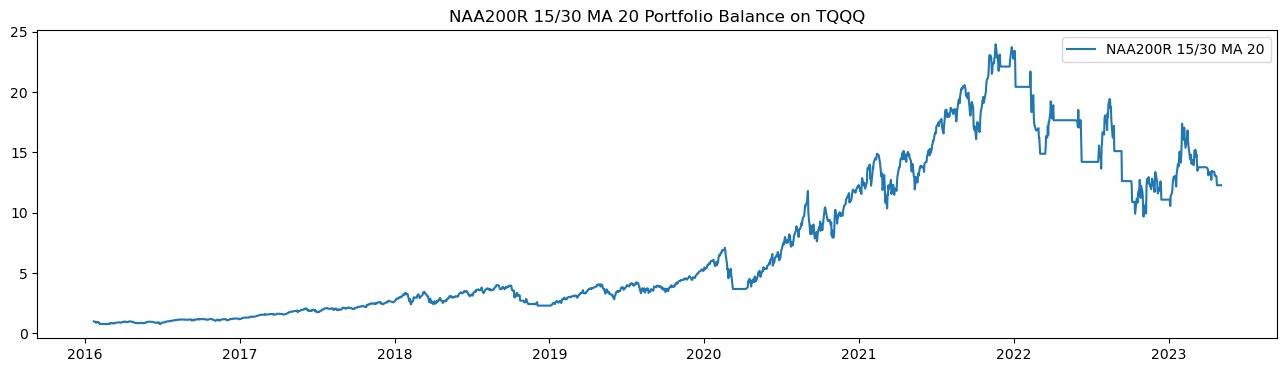

In [9]:
import matplotlib.pyplot as plt
plt.savefig('data/{}_naa200r_bt_daily_{}-{}.png'.format(ticker.ticker,ticker.start_date.date(),ticker.end_date.date()))
naa200r_bt_daily.trade_records.to_csv('data/{}_naa200r_15-30-MA20-daily_{}-{}.csv'.format(ticker.ticker,ticker.start_date.date(),ticker.end_date.date()))
naa200r_bt_daily.performance_summary()
naa200r_bt_daily.plot_balance()

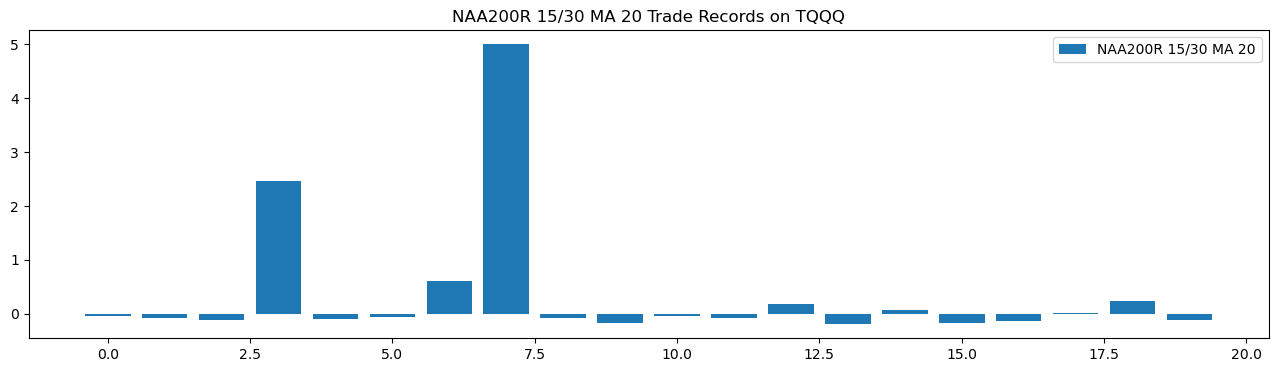

In [10]:
naa200r_bt_daily.plot_records()

Index(['Day', 'Open', 'High', 'Low', 'NAA200R', 'Volume', 'MA20', 'Signal'], dtype='object')
Index(['TQQQ', 'Weekday', 'Signal_x', 'BSignal', 'SSignal', 'Cash', 'Stock',
       'Total', 'Margin', 'Trade', 'Buy Price', 'Profit', 'Day', 'Open',
       'High', 'Low', 'NAA200R', 'Volume', 'MA20', 'Signal_y'],
      dtype='object')


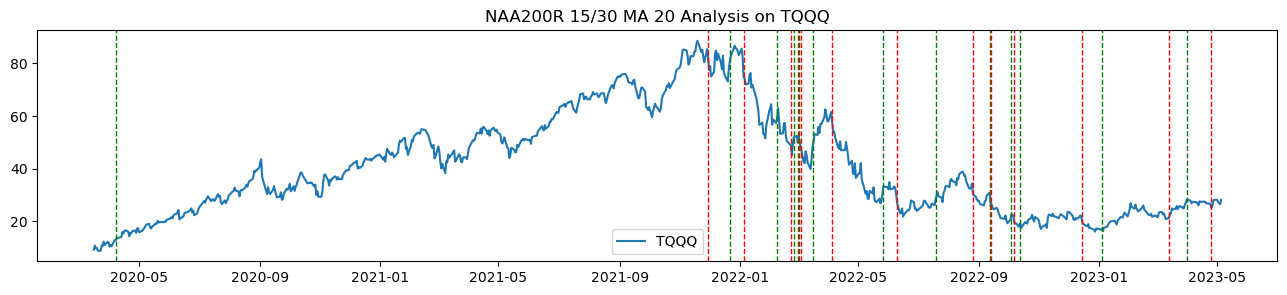

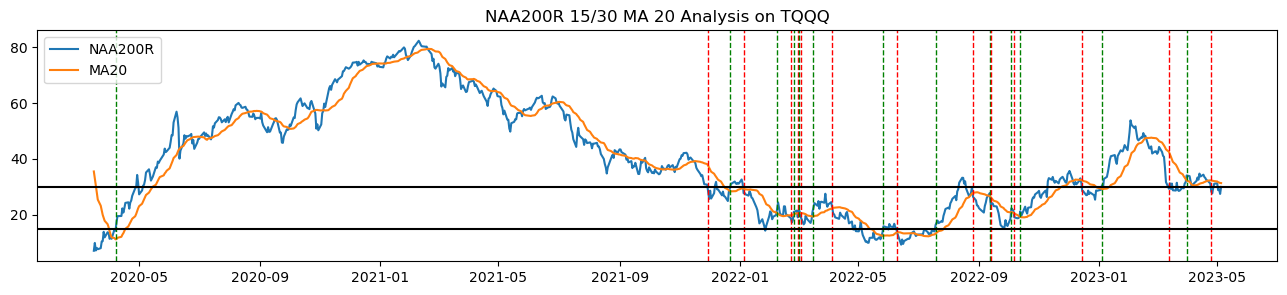

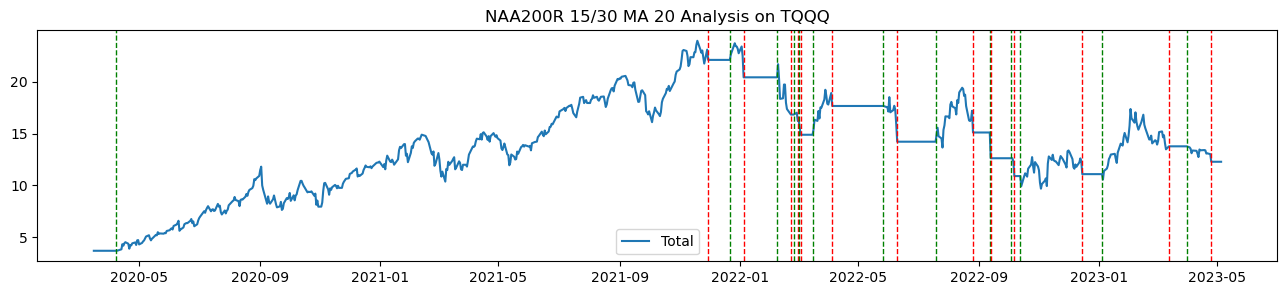

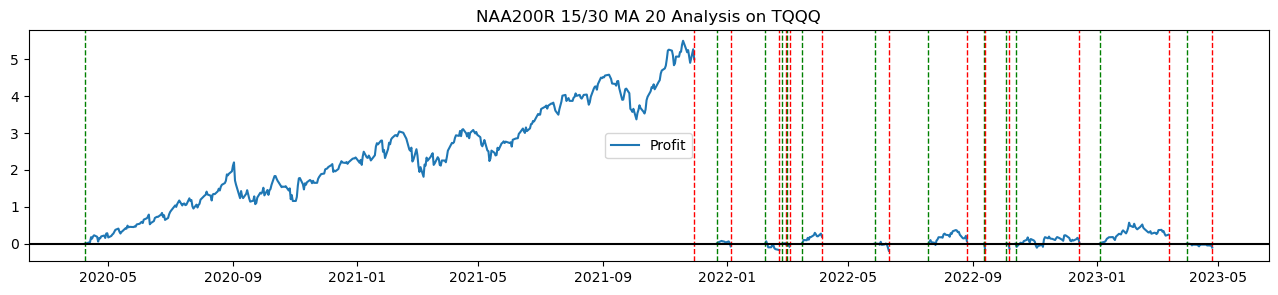

In [12]:

print(stg.joined_data.columns)
print(naa200r_bt_daily.joined_data.columns)
plot_start = dt.datetime(2020,3,14)
plot_end = dt.datetime(2023,5,5)
naa200r_bt_daily.plot_joined_data([ticker.ticker], plot_start, plot_end)
naa200r_bt_daily.plot_joined_data(['NAA200R','MA20'], plot_start, plot_end, ydash_low=15, ydash_high=30)
naa200r_bt_daily.plot_joined_data(['Total'], plot_start, plot_end)
naa200r_bt_daily.plot_joined_data(['Profit'], plot_start, plot_end, ydash_low=0)